# **Project 2 - Part 3**


## **Import Libraries**

In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## **Load and Inspect the Data**

### **Load the Data**

### **1. Source of Data**

**Heart Failure Prediction Dataset**

[Data Source](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)

In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

### **Inspect the Data**

In [ ]:
# Display the first (5) rows of the dataframe
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### **Brief Description of Dataset** 

The Dataset is from Kaggle

The data contains 918 observations with 12 attributes for causing Heart disease.

#### **Target**

To predict occurence of Heart disease based on 12 attributes or features

#### **Classification or Regression Problem**

This is a Classification problem

In [ ]:
## Display the number of rows and columns for the dataframe
df_heart.shape
print(f'There are {df_heart.shape[0]} rows, and {df_heart.shape[1]} columns.')
print(f'The rows represent {df_heart.shape[0]} observations, and the columns represent {df_heart.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


In [ ]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### **Features and Rows of Dataset**

In [ ]:
#To inspect features and rows of the dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Has 12 Columns and 918 rows**

In [ ]:
## Display the descriptive statistics for the numeric columns
df_heart.describe(include="number") # or 'object'

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
## Display the descriptive statistics for the non-numeric columns
df_heart.describe(exclude="number") # or 'object'

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## **Clean the Data**

### **Remove Unnecessary Columns**

 - There are no columns to be dropped

### **Remove Unecessary Rows**

#### **Duplicates**

In [ ]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_heart.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [ ]:
## Display column names and datatypes
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

- All collumns appear to have the appropriate data types.

### **Inspect Column Names for Errors**

- Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.
- Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

In [ ]:
## Display column names
df_heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

- No errors noted.

### **Missing Values**

In [ ]:
# Display the total number of missing values
print(f'There are {df_heart.isna().sum().sum()} missing values.')

There are 0 missing values.


In [ ]:
# Display the count of missing values by column
print(df_heart.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


- If there are no missing values we will not need to impute any. 
 - We will not need to use SimpleImputer in our preprocessing steps.

- **Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage**

### **Inspect Values for Errors**

#### **Numeric Columns**

- Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [ ]:
#View statistical representation of data to research outliers
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### **Outliers**

- There seems to be outliers in the dataset as 0 is not a valid cholesterol reading.

In [ ]:
#Finding the average cholesterol input to replace instances of 0
#cho_mean = df_heart['Cholesterol'].mean()

In [ ]:
#Using the average cholesterol input to replace instances of 0
#df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, cho_mean)
#df_heart

In [ ]:
#Verifying there are no instances of 0 in the Cholesterol column
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#To check data categories
for col in df_heart.select_dtypes('object'):
  print(df_heart[col].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


There are no inconsistencies in the data categories

In [ ]:
#For categorical data statistics
df_heart.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## **Data Visualization**

## **Visuals for Numeric Data**

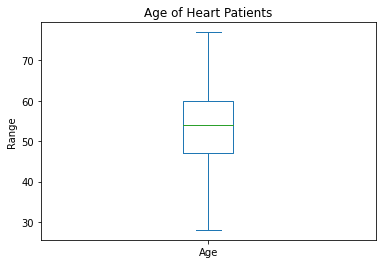

In [ ]:
df_heart['Age'].plot(kind='box')
plt.title('Age of Heart Patients')
plt.ylabel('Range');

- Boxplot shows no outliers
- Age range from 45 - 60 

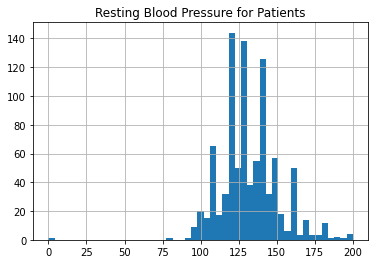

In [ ]:
df_heart['RestingBP'].hist(bins='auto')
plt.title('Resting Blood Pressure for Patients')
plt.show()

- Common RBP for patients are in normal range 

<AxesSubplot:xlabel='Cholesterol'>

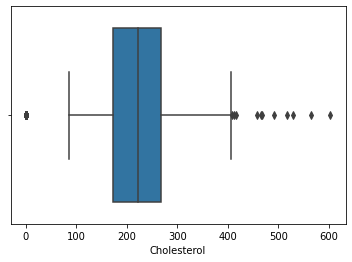

In [ ]:

sns.boxplot(data = df_heart, x= 'Cholesterol')

- Multiple Outliers surpass the 400 range

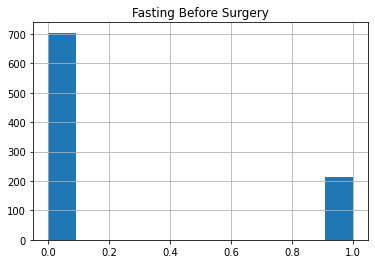

In [ ]:
df_heart['FastingBS'].hist(bins='auto')
plt.title('Fasting Before Surgery')
plt.show()

Most Patients did not fast before surgery

<AxesSubplot:xlabel='MaxHR'>

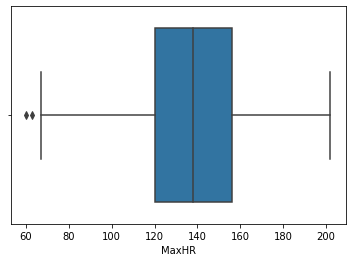

In [ ]:
sns.boxplot(data = df_heart, x= 'MaxHR')

There are few outliers that report a Lower than normal Heart Rate

<AxesSubplot:>

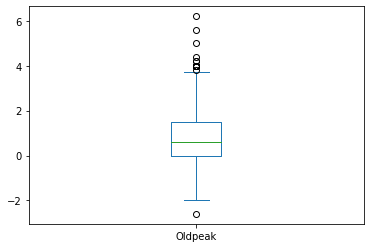

In [ ]:
df_heart['Oldpeak'].plot(kind='box')

- Multiple outliers on both sides of the boxplot, showing data outside of the normal range regarding depression and its effects on Heart Patients

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

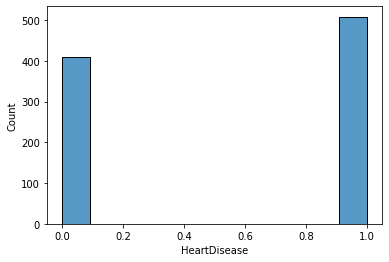

In [ ]:
sns.histplot(data = df_heart, x = 'HeartDisease')

- shows the distribution of values between each category
- Majority of Patients in this data have Heart disease

## **Visuals for Categorical Data**

<AxesSubplot:xlabel='Sex', ylabel='Count'>

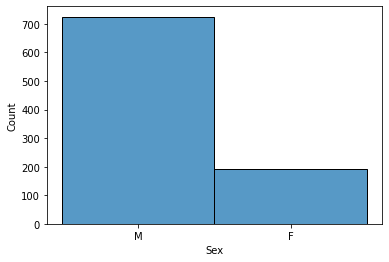

In [ ]:
sns.histplot(data = df_heart, x = 'Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

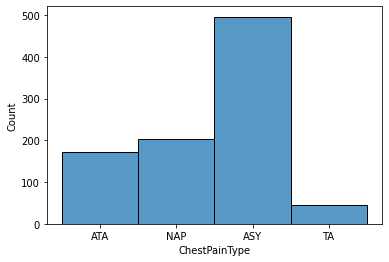

In [ ]:
sns.histplot(data = df_heart, x = 'ChestPainType')

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

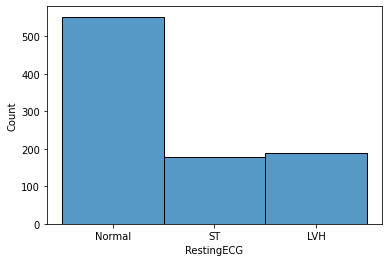

In [ ]:
sns.histplot(data = df_heart, x = 'RestingECG')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

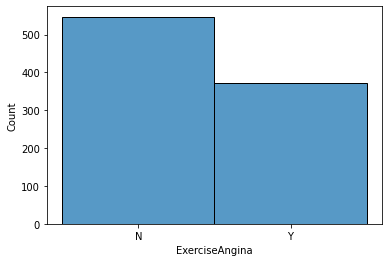

In [ ]:
sns.histplot(data = df_heart, x = 'ExerciseAngina')

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

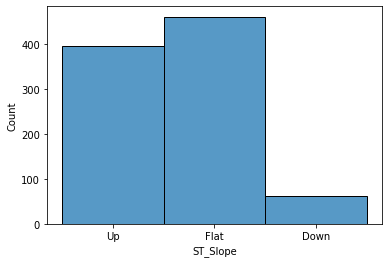

In [ ]:
sns.histplot(data = df_heart, x = 'ST_Slope')

## **Project 2 - Part 3**

<AxesSubplot:>

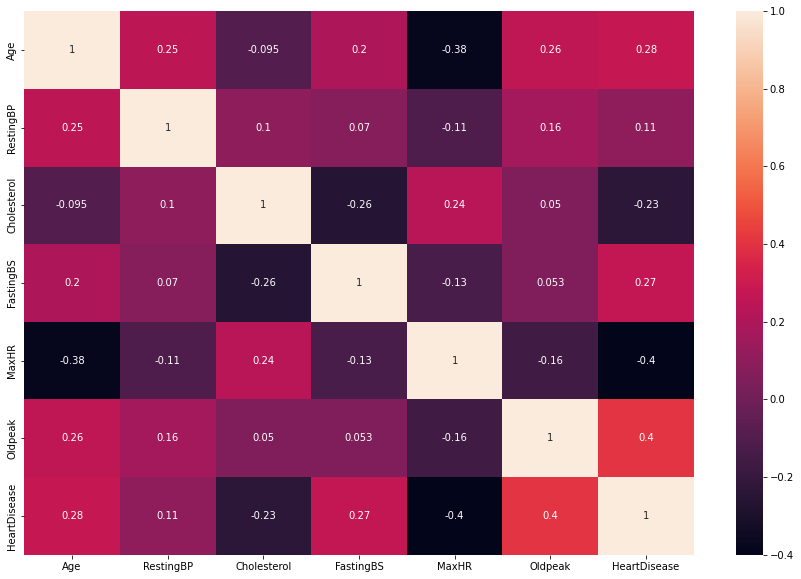

In [ ]:
#To visualize correlation between Heart disease and other features
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_heart.corr(), annot= True, ax=ax)

- Shows high correlation of Age,FastinBS and Oldpeak to Heartdisease.

- Also shows a negative correlation of MaxHR to Heartdisease

### **Creating Two visuals to demonstrate key findings of interest to a Stakeholder**

Text(6.674999999999997, 0.5, 'ST depression')

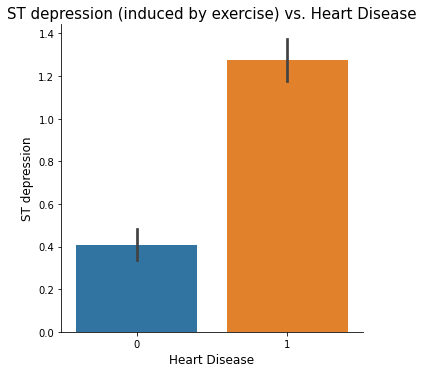

In [ ]:
#To plot a barplot representing the relationship between ST depression and Heart Disease
sns.catplot(x="HeartDisease", y="Oldpeak", kind="bar", data=df_heart);

plt.title('ST depression (induced by exercise) vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=12)
plt.ylabel('ST depression',size=12)

The graph above is showing the distribution of the oldpeak feature relative to heart disease. The oldpeak features refers to the ST depression induced by exercise relative to rest. This is the stress caused by the amount of effort exerted in exercise or physical activity. The results from the dataset shows a positive correlation between this feature and Heart Disease. Patients with higher level of oldpeak can be advised to reduce the amount of effort exerted in exercise or physical activity they are currently partaking in to reduce the risk of getting Heart Disease.

Text(0, 0.5, 'HeartDisease')

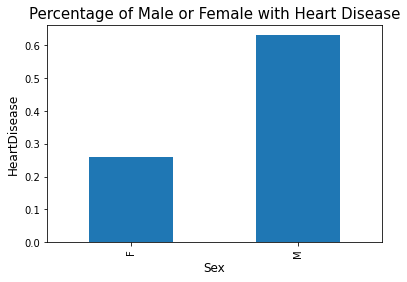

In [ ]:
#To plot Percentage of Heart disease by gender

#Percentage of Heart disease by gender
df_groups = df_heart.groupby('Sex')['HeartDisease'].mean()

#create bar plot by group
df_groups.plot(kind='bar')

plt.title('Percentage of Male or Female with Heart Disease',size=15)
plt.xlabel('Sex',size=12)
plt.ylabel('HeartDisease',size=12)

The graph above shows the percentage of Male and Female with Heart Disease. From the dataset provided, about 64% of the Male instances have Heart Disease and 26% of the Female instances have Heart Disease. Maybe Male patients should be advised to schedule appointments regularly to assess their risk for Heart Disease.

### **To plot a graph showing the relationship between Age and Heart Disease**

In [ ]:
#Creating variables for Age distribution

def bin_Age(Age):
  if Age < 45:
    return '0-45'
  elif Age < 50:
    return '45-50'
  elif Age < 55:
     return '50-55'
  elif Age < 60:
     return '55-60'
  elif Age < 65:
    return '60-65'
  elif Age < 70:
    return '65-70'
  else:
    return '70+'

In [ ]:
#To apply Bin function for Age with a new column
df_heart['Age_Bin']= df_heart['Age'].apply(bin_Age)

#Verifying new column was created
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0-45
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,45-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0-45
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,45-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-55


Text(0, 0.5, 'HeartDisease')

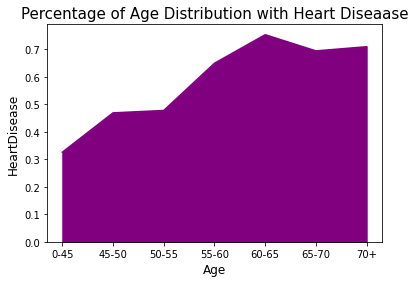

In [ ]:
#Using Groupby to plot the Percentage of Age Distribution with Heart Disease
df_groups1 = df_heart.groupby('Age_Bin')['HeartDisease'].mean()

df_groups1.plot(kind='area', color= 'purple')

plt.title('Percentage of Age Distribution with Heart Diseaase',size=15)
plt.xlabel('Age',size=12)
plt.ylabel('HeartDisease',size=12)

The Age distribution above shows that the risk of Heart Disease increases as patients age. To reduce these risks Patients 45 and older can be advised to adopt healthier lifestyles like eating healthy, getting regular exercise and being on a lower fat diet to reduce the risk of getting Heart Disease.